In [ ]:
#The Sparks Foundation - Data Science & Business Analytics Internship
TASK 1 - Prediction using Supervised Machine Learning In this task it is required to predict the percentage of a student on the basis of number of hours studied using the Linear Regression supervised machine learning algorithm.

Steps: Step 1 - Importing the dataset 
    Step 2 - Visualizing the dataset 
    Step 3 - Data preparation 
    Step 4 - Training the algorithm 
    Step 5 - Visualizing the model 
    Step 6 - Making predcitions 
    Step 7 - Evaluating the model 
    AUTHOR: Sushma Chowdary M 
        STEP 1 - Importing the dataset In this step, we will import the dataset through the link with the help of pandas library and then we will observe the data

In [3]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Read data from the given url
data = "http://bit.ly/w-data"
data = pd.read_csv(data)
data.head()

In [4]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data imported sucessfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [8]:
# Read data from the given url
data = "http://bit.ly/w-data"
data = pd.read_csv(data)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
# Inspect the various aspects of our dataframe

print("Rows :",data.shape[0])
print("Columns :",data.shape[1])

Rows : 25
Columns : 2


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [11]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
#Step 2 : Exploratory Data Analysis

C:\Users\Sushma.DESKTOP-68P1IC3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sushma.DESKTOP-68P1IC3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


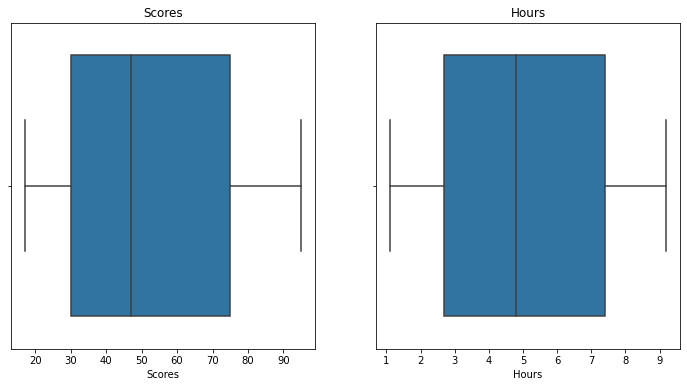

In [12]:
# To check for Outliers

fig = plt.figure(figsize=(12,6))

# putting ylim same for better visibility

ax1 = fig.add_subplot(1, 2, 1, title="Scores")
ax2 = fig.add_subplot(1, 2, 2, title="Hours")

sns.boxplot(data.Scores, ax=ax1)
sns.boxplot(data.Hours, ax=ax2)

plt.show()


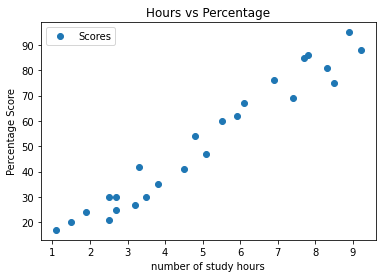

In [14]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('number of study hours')  
plt.ylabel('Percentage Score')  
plt.show()

In [ ]:
#From the above graph, we can infer that there is a positive linear relation between the number of study hours and Percentage Score

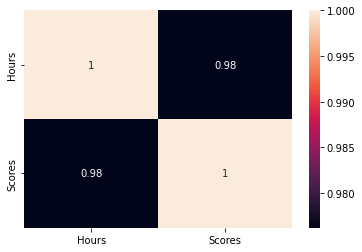

In [15]:
# To check for Correlation

sns.heatmap(data.corr(),annot=True)
plt.show()

In [ ]:
#Hours and Scores are highly Positively correlated to each other

C:\Users\Sushma.DESKTOP-68P1IC3\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


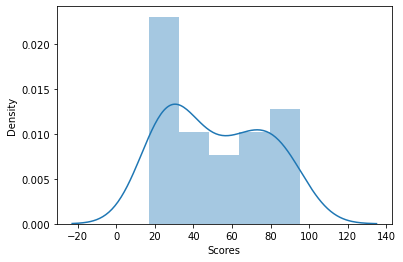

In [16]:
# To check for distribution of Scores in the dataset

sns.distplot(data['Scores'], bins=5)
plt.show()

In [30]:
#Almost normally distributed with skew in the positive side Hence, we can perform a LINEAR REGRESSION to predict the values

Step 3: Performing Simple Linear Regression
Generic Steps in model building
First assign the feature variable, Hours to the variable X and the response variable, Score, to the variable y.
To divide the data into "attributes" (inputs) and "labels" (outputs).

SyntaxError: invalid syntax (Temp/ipykernel_10848/1630915143.py, line 3)

In [31]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [20]:
#Train-Test Split
#To split our variable into training and testing sets.
#Will perform this by importing train_test_split from the sklearn.model_selection library.
#It is usually a good practice to keep 80% of the data in your train dataset and the rest 20% in your test dataset.

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [33]:
#Now let's take a look at train and test datasets individually

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20, 1)
(20,)
(5, 1)
(5,)


In [34]:
X_train

array([[2.7],
       [3.3],
       [5.1],
       [3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

In [35]:
y_train

array([25, 42, 47, 35, 20, 27, 41, 95, 75, 30, 30, 24, 54, 67, 86, 60, 85,
       17, 69, 88], dtype=int64)

In [36]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9]])

In [37]:
y_test

array([81, 30, 21, 76, 62], dtype=int64)

In [ ]:
#After splitting the data into training and testing sets,finally it's the time to train our algorithm.
Step 4 : Training Linear Regression Model

In [38]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(X_train, y_train) 

print("Training complete.")

Training complete.


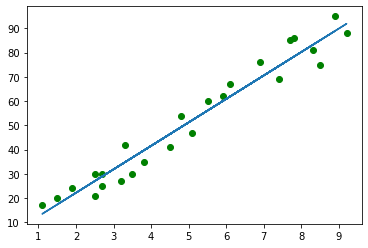

In [39]:
# Plotting the regression line
line = lr.coef_*X+lr.intercept_

# Plotting for the test data
plt.scatter(X, y, c= 'g')
plt.plot(X, line);
plt.show()

In [ ]:
#Checking Accuracy Scores for both training as well as testing sets

In [40]:
print("Training Score:",lr.score(X_train,y_train)*100)
print("Testing Score:",lr.score(X_test,y_test)*100)

Training Score: 94.91209376364415
Testing Score: 96.78055545167994


In [ ]:
#Step 5: Predictions on the Test Set
Now that we have fitted a regression line on our train dataset, it's time to make some predictions on the test data. For this, we first need to add a constant to the X_test data like we did for X_train and then we can simply go on and predict the y values corresponding to X_test using the predict attribute of the fitted regression line.

In [41]:
print("y_test :")
print(y_test)
print()
print("X_test :")
print(X_test)

y_test :
[81 30 21 76 62]

X_test :
[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [42]:
y_pred = lr.predict(X_test) # Predicting the scores
print("y_pred :")
print(y_pred)

y_pred :
[83.18814104 27.03208774 27.03208774 69.63323162 59.95115347]


In [43]:
# Comparing Actual vs Predicted
dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
dataframe

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [ ]:
#What will be predicted score if a student study for 9.25 hrs in a day?

In [44]:
# we can also test with our own data
hours = 9.25
own_pred = lr.predict([[hours]])
print("No of study Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of study Hours = 9.25
Predicted Score = 92.38611528261494


In [ ]:
#Final Step 6: Evaluating the model
The final step is to evaluate the performance of algorithm. This step is quite important to compare how well different algorithms perform on a particular dataset. we have chosen the mean square error. Also, there are many such metrics which we can choose.

In [46]:
from sklearn import metrics

In [ ]:
#Mean Absolute Error

In [47]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 3.9207511902099244


In [ ]:
#Root Mean Square Error

In [48]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 18.943211722315272


In [ ]:
#Conclusion:
After Analysing the dataset we got Predicted score around 92 based on the number of study hours i.e., 9.25 hrs/day.